# Model Classification of Convective Mode

In [1]:
import numpy as np
import pandas as pd
import glob

from tensorflow import keras

In [12]:
#load the csv
df = pd.read_csv('/shared/shared/jcorner_data/pkls/data/images_1991_06.csv')
df

,Unnamed: 0,Index,x,y,Filename,Time
0,0,0,835,445,06011991_T01_0id.npy,1991-06-01T01:00:00.000000000
1,1,1,835,446,06011991_T01_1id.npy,1991-06-01T01:00:00.000000000
2,2,2,834,447,06011991_T01_2id.npy,1991-06-01T01:00:00.000000000
3,3,3,837,450,06011991_T01_3id.npy,1991-06-01T01:00:00.000000000
4,4,4,840,450,06011991_T01_4id.npy,1991-06-01T01:00:00.000000000
...,...,...,...,...,...,...
662,662,662,801,639,06301991_T22_662id.npy,1991-06-30T22:00:00.000000000
663,663,663,802,639,06301991_T22_663id.npy,1991-06-30T22:00:00.000000000
664,664,664,801,640,06301991_T22_664id.npy,1991-06-30T22:00:00.000000000
665,665,665,802,640,06301991_T22_665id.npy,1991-06-30T22:00:00.000000000


In [13]:
#find all files in the data directory
files = glob.glob('/home/jovyan/shared/jcorner_data/pkls/data/*.npy')
files.sort()
len(files)

612

In [14]:
#load the CNN model
model = keras.models.load_model("/home/jovyan/shared/jcorner_data/models/morph_model_v03.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 134, 134, 32)      320       
                                                                 
 spatial_dropout2d (SpatialD  (None, 134, 134, 32)     0         
 ropout2D)                                                       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 44, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        18496     
                                                                 
 spatial_dropout2d_1 (Spatia  (None, 42, 42, 64)       0         
 lDropout2D)                                                     
                                                        

In [15]:
#create a list with the number corresponding to the convective mode.
lookup = {0:'isolated_cell', 1:'multiple_isolated_cells', 
          2:'loosely_clustered_cells', 3:'tightly_clustered_cells', 
          4:'qlcs', 5:'tropical'}

#create the new dataframe with the mode column
new_df = pd.DataFrame(columns=['Index', 'x', 'y', 'Filename', 'Time', 'Mode'])

#iterate through all the numpy files in the directory
for path in files:
    
    #isolate the filename from the path and dataframe
    filename = path[43:]
    row = df[(df['Filename']==filename)]

    #load the file
    file = np.load(path)

    if file.shape == (136, 136):
        
        #normalize the data
        file = file/80
    
        #expand the dimensions to the correct size
        file = np.expand_dims(file, 2)
        file = np.expand_dims(file, 0)
    
        #classify the convective mode using the CNN
        pred = model.predict(file)
        mode = [lookup[x] for x in np.argmax(pred, axis=1)]

        new_df = new_df.append({'Index': row.Index.values[0], 'x': row.x.values[0], 'y':row.y.values[0], 'Filename': row.Filename.values[0], 'Time':row.Time.values[0], 'Mode': mode[0]}, ignore_index=True)

new_df

,Index,x,y,Filename,Time,Mode
0,0,835,445,06011991_T01_0id.npy,1991-06-01T01:00:00.000000000,tropical
1,10,842,451,06011991_T01_10id.npy,1991-06-01T01:00:00.000000000,tropical
2,11,843,451,06011991_T01_11id.npy,1991-06-01T01:00:00.000000000,qlcs
3,12,840,452,06011991_T01_12id.npy,1991-06-01T01:00:00.000000000,tropical
4,13,841,452,06011991_T01_13id.npy,1991-06-01T01:00:00.000000000,tropical
...,...,...,...,...,...,...
587,662,801,639,06301991_T22_662id.npy,1991-06-30T22:00:00.000000000,qlcs
588,663,802,639,06301991_T22_663id.npy,1991-06-30T22:00:00.000000000,qlcs
589,664,801,640,06301991_T22_664id.npy,1991-06-30T22:00:00.000000000,qlcs
590,665,802,640,06301991_T22_665id.npy,1991-06-30T22:00:00.000000000,qlcs


<AxesSubplot:>

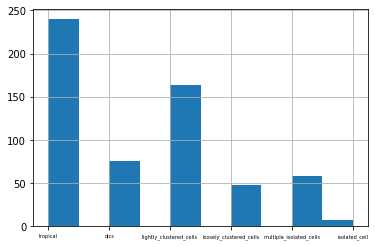

In [22]:
new_df.Mode.hist(xlabelsize = 5)

In [30]:
classes = pd.read_csv("/shared/shared/jcorner_data/classifications.csv")
classes[(classes['Class Name'] == 'tightly_clustered_cells')]

,UNID,Class Code,Class Name,om,tz,st,stf,stn,mag,inj,...,f3,f4,fc,init_date,fmt_date,date_utc,yr,mo,dy,hr
2203,199604150140z000000141,3,tightly_clustered_cells,141,3,LA,22,6,0,0,...,0,0,0,1996-04-14-19:40:00,4/14/1996 19:40,4/15/1996 1:40,1996,4,15,1
2204,199604192240z000000047,3,tightly_clustered_cells,47,3,IL,17,7,1,0,...,0,0,0,1996-04-19-16:40:00,4/19/1996 16:40,4/19/1996 22:40,1996,4,19,22
2205,199604192244z000000197,3,tightly_clustered_cells,197,3,IL,17,8,0,0,...,0,0,0,1996-04-19-16:44:00,4/19/1996 16:44,4/19/1996 22:44,1996,4,19,22
2206,199604192300z000001138,3,tightly_clustered_cells,1138,3,IL,17,10,0,0,...,0,0,0,1996-04-19-17:00:00,4/19/1996 17:00,4/19/1996 23:00,1996,4,19,23
2207,199604192307z000000207,3,tightly_clustered_cells,207,3,IL,17,11,2,1,...,0,0,0,1996-04-19-17:07:00,4/19/1996 17:07,4/19/1996 23:07,1996,4,19,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,201705182157z000615222,3,tightly_clustered_cells,615222,3,OK,40,0,-9,0,...,0,0,0,2017-05-18-15:57:00,5/18/2017 15:57,5/18/2017 21:57,2017,5,18,21
3143,201705182205z000615223,3,tightly_clustered_cells,615223,3,OK,40,0,0,0,...,0,0,0,2017-05-18-16:05:00,5/18/2017 16:05,5/18/2017 22:05,2017,5,18,22
3144,201705182249z000615225,3,tightly_clustered_cells,615225,3,KS,20,0,0,0,...,0,0,0,2017-05-18-16:49:00,5/18/2017 16:49,5/18/2017 22:49,2017,5,18,22
3145,201705182252z000615226,3,tightly_clustered_cells,615226,3,KS,20,0,0,0,...,0,0,0,2017-05-18-16:52:00,5/18/2017 16:52,5/18/2017 22:52,2017,5,18,22
